In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
## static S(Q)
nQ = 25
nE = 41
Q = (np.arange(nQ)+1)/nQ * 20
E = np.linspace(-10, 10, nE)
phi = 0.36

def S(Q, phi):
    """Static structure factor for hard-sphere system."""
    
    alpha = (1 + 2 * phi)**2 / (1 - phi)**4
    beta = -6 * phi * (1 + phi / 2)**2 / (1 - phi)**4
    gama = phi * alpha / 2

    G_hs = (alpha * (np.sin(Q) - Q * np.cos(Q)) / Q**2 +
        beta * (2 * Q * np.sin(Q) + (2 - Q**2) * np.cos(Q) - 2) / Q**3 +
        gama * (-Q**4 * np.cos(Q) + 4 * ((3 * Q**2 - 6) * np.cos(Q) +
        (Q**3 - 6 * Q) * np.sin(Q) + 6)) / Q**5)
    S = 1 / (24 * phi * (G_hs) / Q + 1)*np.exp(-Q**2 / 2/10**2)
    return S

S0 = S(Q, phi)

delta_E = Q/10
# Lorentzian peak centered at E=0 with width delta_E for each Q
Se = 1 / (1 + (E[:, None] / delta_E)**2) * np.exp(-E[:, None]/5)

S_GT = Se*S0
f_count = 30
S_count = S_GT*f_count
S_std = np.sqrt(S_count)/f_count
S_noise = np.random.normal(0, S_std, S_count.shape)
S_obs = S_GT + S_noise

nQ_dense = 101
# Q_dense = np.linspace(0, 20, nQ_dense)
Q_dense = Q
nE_dense = 201
E_dense = np.linspace(-10, 10, nE_dense)

delta_E_dense = Q_dense /10
Se_dense = 1 / (1 + (E_dense[:, None] / delta_E_dense)**2) * np.exp(-E_dense[:, None]/5)

Q_dense2 = np.linspace(0, 20, nQ_dense)
S0_dense = S(Q_dense2, phi)

/tmp/ipykernel_2496245/1889524861.py:15: RuntimeWarning: invalid value encountered in divide
  G_hs = (alpha * (np.sin(Q) - Q * np.cos(Q)) / Q**2 +
/tmp/ipykernel_2496245/1889524861.py:16: RuntimeWarning: invalid value encountered in divide
  beta * (2 * Q * np.sin(Q) + (2 - Q**2) * np.cos(Q) - 2) / Q**3 +
/tmp/ipykernel_2496245/1889524861.py:17: RuntimeWarning: invalid value encountered in divide
  gama * (-Q**4 * np.cos(Q) + 4 * ((3 * Q**2 - 6) * np.cos(Q) +


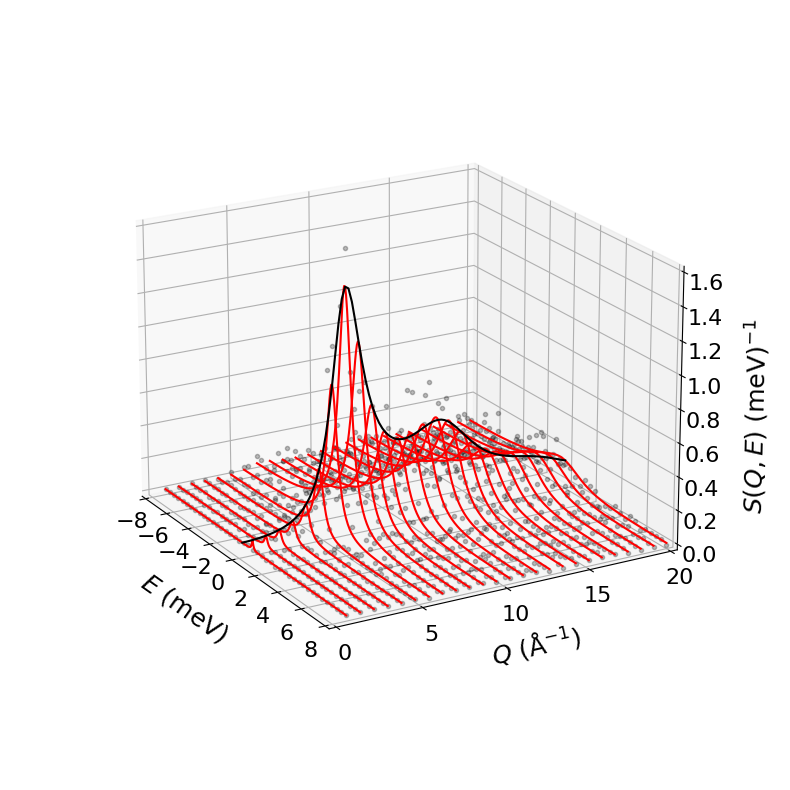

In [71]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d.art3d import Line3DCollection

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(Q_dense, E_dense)
Z = Se_dense * S0
Z_obs = S_obs

for i in range(len(Q)):
    q_val = Q[i]
    x = E
    y = q_val * np.ones_like(E)
    z = Z_obs[:, i]
    ax.plot(x, y, z, 'k.', linewidth=1.5, alpha=0.25)
    
# Then draw red lines on top
for i in range(len(Q)):
    q_val = Q[i]
    x = E_dense
    y = q_val * np.ones_like(E_dense)
    z = Z[:, i]
    ax.plot(x, y, z, 'r', linewidth=1.5)
    
ax.plot(np.zeros_like(Q_dense2), Q_dense2, S0_dense, '-', color='black')


ax.set_xlabel(r'$E\ (\mathrm{meV})$', fontsize=18, labelpad=18)
ax.set_ylabel(r'$Q\ (\mathrm{Å}^{-1})$', fontsize=18, labelpad=18)
ax.set_zlabel(r'$S(Q, E)\ (\mathrm{meV})^{-1}$', fontsize=18, labelpad=18)
ax.set_zlim(0, 1.6)
ax.set_xlim(-8, 8)
ax.set_ylim(0, 20)
ax.set_yticks(np.arange(0, 21, 5))
ax.view_init(elev=20, azim=-30)
ax.set_box_aspect(None, zoom=0.8)
ax.tick_params(direction='in', labelsize=16)
plt.show()
